# Time Series Analysis for Netflix

Time series is one of the most common data types encountered in daily life. Nowadays, most marketers use time series analysis for research and for market demand forecasting. Here We investigate factors behind Google search interest for Netflix, analyzing it with time series analysis in order to detect the pattern behind the data and forecast the trend for next year.   

## Stationary 
Since stationarity is an assumption underlying many statistical procedures used in time series analysis, non-stationary data is often transformed to become stationary. Thus we have transfered the google trend data into stationary, the parameters such as mean and variance do not change over time.

## Decompose the time series
Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.
Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
from statsmodels.tsa import seasonal

In [2]:
netflix = pd.read_csv('netflix.googletrends.csv', parse_dates = ['period'])
netflix['period'] = netflix['period'].dt.date
netflix.head()

,Unnamed: 0,date,value,period,onediffvalue
0,0,Oct 07 2013,20942.326772,2013-10-07,NaN
1,1,Oct 08 2013,19561.720016,2013-10-08,-1380.606756
2,2,Oct 09 2013,19687.062718,2013-10-09,125.342702
3,3,Oct 10 2013,19506.168851,2013-10-10,-180.893867
4,4,Oct 11 2013,20603.586578,2013-10-11,1097.417727


In [3]:
netflix.set_index('period', inplace = True)
netflix.head()

,Unnamed: 0,date,value,onediffvalue
period,,,,
2013-10-07,0,Oct 07 2013,20942.326772,NaN
2013-10-08,1,Oct 08 2013,19561.720016,-1380.606756
2013-10-09,2,Oct 09 2013,19687.062718,125.342702
2013-10-10,3,Oct 10 2013,19506.168851,-180.893867
2013-10-11,4,Oct 11 2013,20603.586578,1097.417727


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


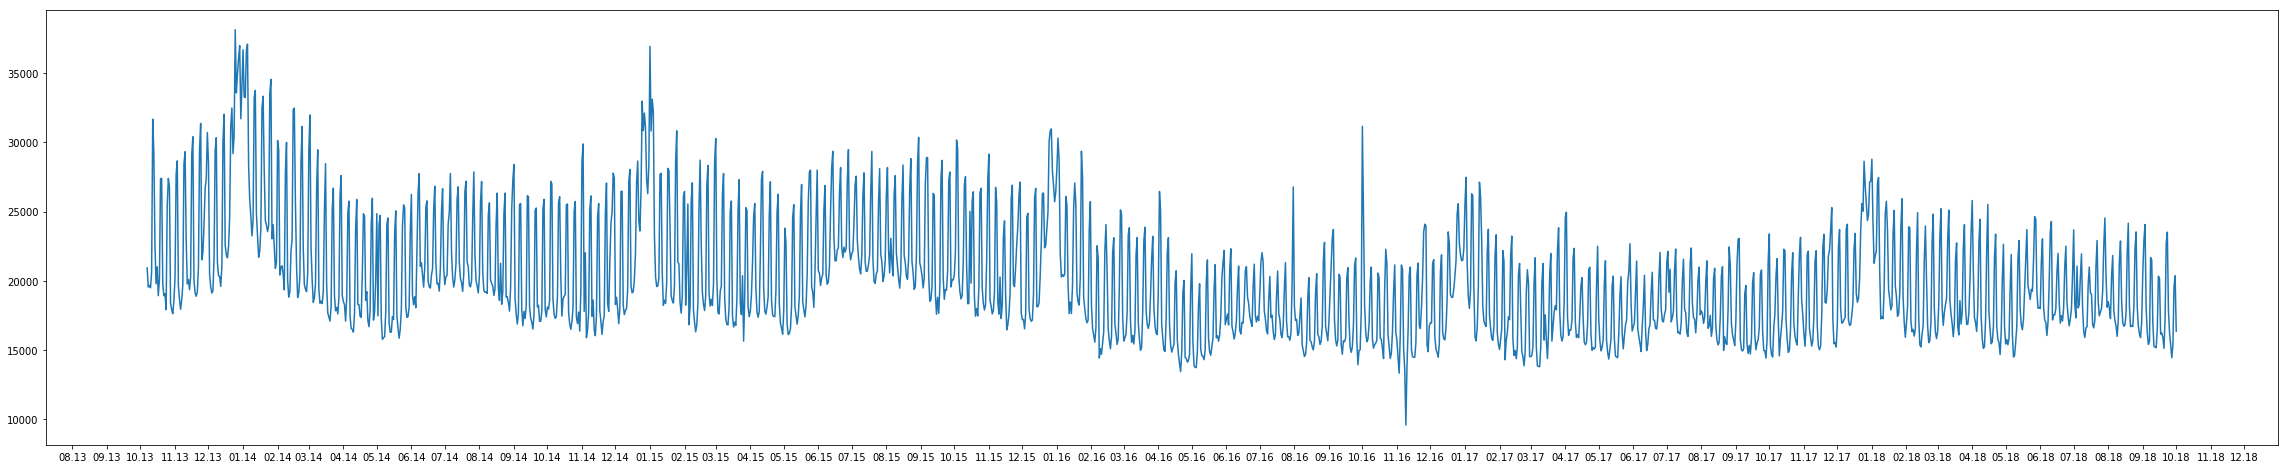

In [4]:
dimensions = (40,8)
fig, ax = pyplot.subplots(figsize = dimensions)
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearmonth = mdates.DateFormatter('%m.%y')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearmonth)
ax.plot(netflix.index, netflix['value'])

The above graph shows time series with a peak in search number from 2013.8 to 2018.10.  Below we do cyclic decomposition into four graphs : observation, trend, seasonal and residual. 

In [5]:
decompose_model = seasonal.seasonal_decompose(netflix['value'].tolist(),freq=365)

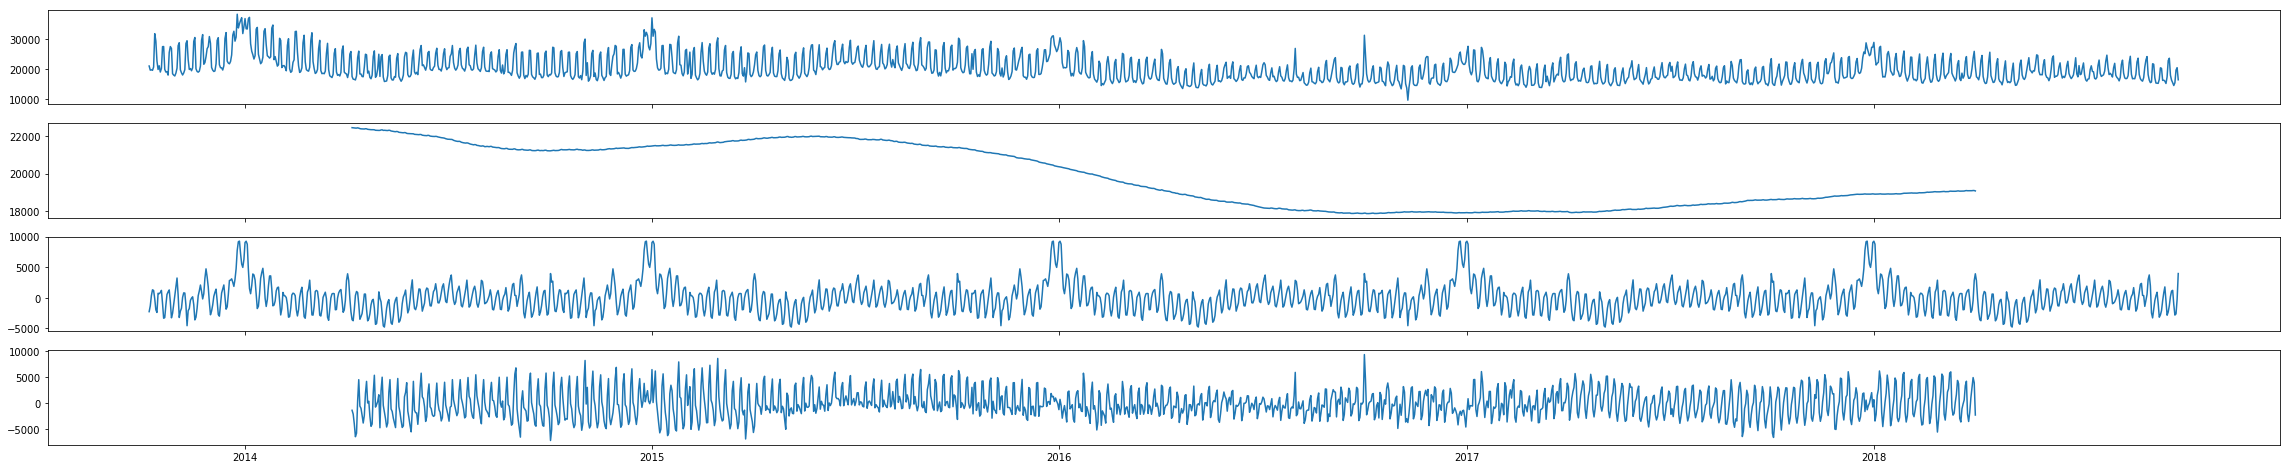

In [6]:
dimension = (10,10)
fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(4, figsize= dimensions, sharex = 'all')

ax1.plot(netflix.index, netflix['value'])
ax2.plot(netflix.index, decompose_model.trend)
ax3.plot(netflix.index, decompose_model.seasonal)
ax4.plot(netflix.index, decompose_model.resid)

The overall trend of Netfix from 2014 to 2018 declined. Note that there is a dramatic decrease in 2016 and rise a little in the middle of 2017.  In 2014, the search number is above 22,000. However,the search interest reaches the lowest point in the middle of 2016, with approximately 18,000 searches. Nevertheless, beginning in the middle of 2017, the search number increases to a little above 18,000.

The seasonal trend of Netflix follows a regular pattern. The peak of searching interest occurs at the end and beginning of each year. That makes sense since the Thanksgiving and Christmas holidays take place at the end of each year. People usually have a family reunion during the holidays, which is a good time to watch films or videos at home so they would search film-streaming websites in order to look for some good movies for holidays. Netflix is one of the biggest film-streamig brands, people definitely search "Netflix" on Google. At the same time, Netflix may promote new films on holidays, appeal people to subscribe! Thus, I think the seasonality of Netflix driven by both the product and consumers

In [7]:
netflix['seasonal'] = decompose_model.seasonal
netflix.head()

,Unnamed: 0,date,value,onediffvalue,seasonal
period,,,,,
2013-10-07,0,Oct 07 2013,20942.326772,NaN,-2275.622939
2013-10-08,1,Oct 08 2013,19561.720016,-1380.606756,-1338.165161
2013-10-09,2,Oct 09 2013,19687.062718,125.342702,332.266438
2013-10-10,3,Oct 10 2013,19506.168851,-180.893867,1304.657193
2013-10-11,4,Oct 11 2013,20603.586578,1097.417727,1190.433011


In [8]:
startdate = pd.to_datetime("2017-01-01").date()
enddate = pd.to_datetime("2017-12-31").date()
oneyear = netflix.loc[startdate:enddate]
oneyear.head()

,Unnamed: 0,date,value,onediffvalue,seasonal
period,,,,,
2017-01-01,1182,Jan 01 2017,25511.646222,3189.665926,9261.319324
2017-01-02,1183,Jan 02 2017,27488.763763,1977.117541,8767.236522
2017-01-03,1184,Jan 03 2017,21229.415937,-6259.347826,4596.968291
2017-01-04,1185,Jan 04 2017,18881.048826,-2348.367111,1496.449263
2017-01-05,1186,Jan 05 2017,18018.818470,-862.230356,662.456218


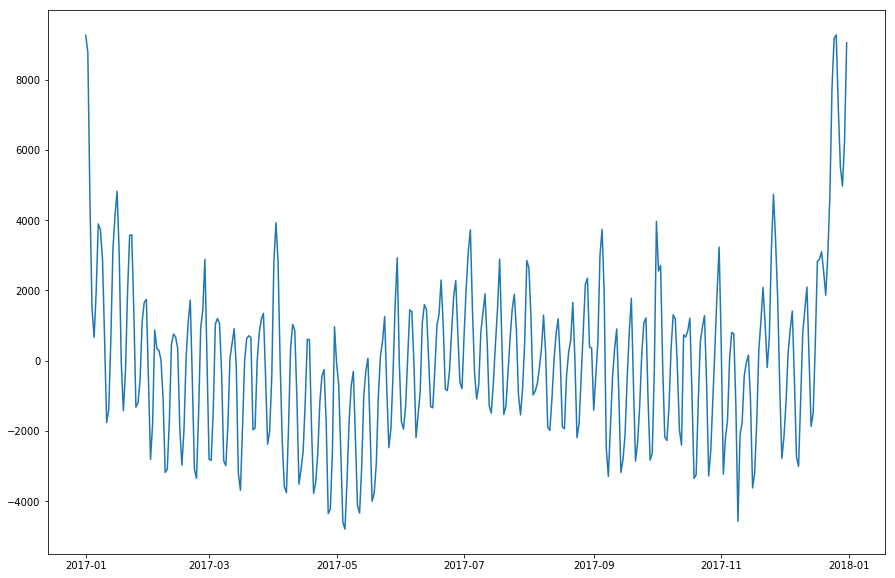

In [9]:
dimensions = (15,10)
fig, ax1 = pyplot.subplots(figsize = dimensions)
pyplot.plot(oneyear.index, oneyear.seasonal) # x-axis is index, and y-axis is seasonal of oneyear dataframe

This graph is an abstract of one year data to see the seasonal trend of a year. The graph indicates the hightest peak in December,and the lowest point in May.The trend shows a decline from January to May, then increases steadly until September. Moreover, we observe some hight points in January, March, end of May and July to December.  Opposite the low points occurs in the beginning of May and beginning of November.  That corresponds to the student calendar and the holidays of the calendar. We could infer students are a major group of customers of Netflix.



## Prophet time series analysis
### create a forecast for the next calendar year

In [10]:
from fbprophet import Prophet

netflix = pd.read_csv('netflix.googletrends.csv', parse_dates = ['period'])
netflix.head()

,Unnamed: 0,date,value,period,onediffvalue
0,0,Oct 07 2013,20942.326772,2013-10-07,NaN
1,1,Oct 08 2013,19561.720016,2013-10-08,-1380.606756
2,2,Oct 09 2013,19687.062718,2013-10-09,125.342702
3,3,Oct 10 2013,19506.168851,2013-10-10,-180.893867
4,4,Oct 11 2013,20603.586578,2013-10-11,1097.417727


In [11]:
prophetdataframe = pd.DataFrame()
prophetdataframe['ds'] = netflix['period']
prophetdataframe['y'] = netflix['value']
prophetdataframe.head()

,ds,y
0,2013-10-07,20942.326772
1,2013-10-08,19561.720016
2,2013-10-09,19687.062718
3,2013-10-10,19506.168851
4,2013-10-11,20603.586578


In [12]:
m = Prophet()
m.fit(prophetdataframe)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = m.make_future_dataframe(periods = 365) 
future.tail()

,ds
2181,2019-09-27
2182,2019-09-28
2183,2019-09-29
2184,2019-09-30
2185,2019-10-01


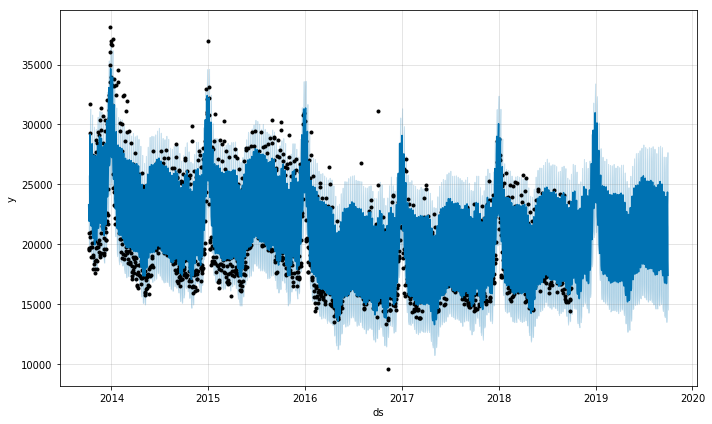

In [14]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

The above graph shows 2019 search interest forecast. Compared to the top graph, most patterns are similar, but there are some differences. Here we show the weekly and yearly predictions using prophet which draws the line smoothly and is easier to understand. The high interest times are at the end and the begining of each year, and the low interest times are in May and spring time. 

Note that there are some outliers in 2015 and the end of 2016. The black dots indicate the outliers, the wide blue area is the prediction based on the model, and the light blue area is the error margin of the prediction.

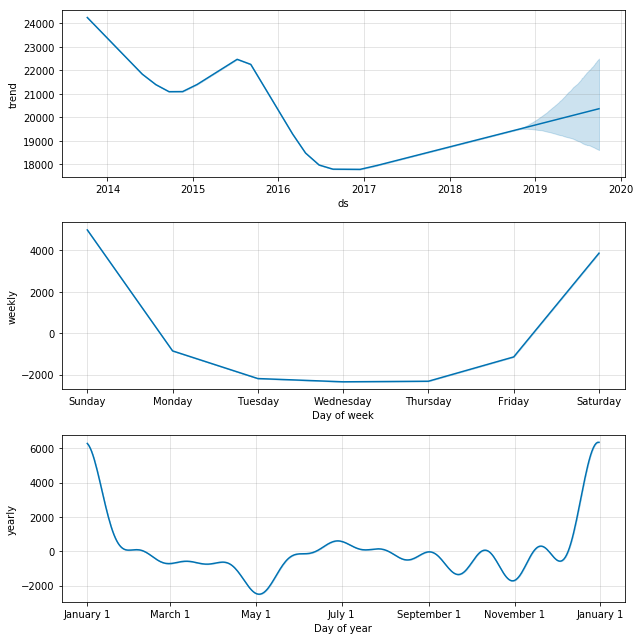

In [15]:
fig2 = m.plot_components(forecast)

The forecast and component visualizations show that Prophet is able to accurately model the underlying trend in the data, and also accurately model weekly and yearly seasonality. Obviously, the trend image (top figure) shows the trend decline but we observe the forecast trend in 2019 is increasing. We would like to note, the light blue forcast area shows the range of posibilities where the most likely outcome is a slight increase, but we do see the chance of decrease as well.

Again in the first graph, there are 2 significant drop points, one is at the end of 2014 which had 21,000 searches, another one is at end of 2016, where the searches are below 18,000! The weekly seasonality presents a U shape which indicates the high searching interests occur on the weekend (Friday to Sunday). The yearly seasonality also exhibits a U shape but dramatically decreases in May. This is reasonable because the high searching volume corresponds with the weekend and the end of each year. This timing is when poeple have their freetime to watch movies and films with family or friends. Thus we can conclude that the weekly seasonality is driven by the consumer but the yearly seasonality is diven by both factors since Netflix also has promotion on holidays.

In [16]:
erroranalysis = m.predict(prophetdataframe)

In [17]:
erroranalysis['value'] = prophetdataframe['y']
erroranalysis['residuals'] =  erroranalysis['value']-erroranalysis['yhat']

erroranalysis['absoluteresiduals'] = abs(erroranalysis['residuals'])
erroranalysis.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,...,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,value,residuals,absoluteresiduals
0,2013-10-07,24242.232598,21069.238057,25721.848564,24242.232598,24242.232598,-943.710023,-943.710023,-943.710023,-853.440081,...,-90.269942,-90.269942,-90.269942,0.0,0.0,0.0,23298.522575,20942.326772,-2356.195803,2356.195803
1,2013-10-08,24231.953361,19724.266054,24169.113456,24231.953361,24231.953361,-2212.021481,-2212.021481,-2212.021481,-2188.123876,...,-23.897605,-23.897605,-23.897605,0.0,0.0,0.0,22019.931880,19561.720016,-2458.211864,2458.211864
2,2013-10-09,24221.674123,19753.213265,24336.063049,24221.674123,24221.674123,-2320.092661,-2320.092661,-2320.092661,-2344.921694,...,24.829033,24.829033,24.829033,0.0,0.0,0.0,21901.581462,19687.062718,-2214.518744,2214.518744
3,2013-10-10,24211.394886,19546.195528,24143.060546,24211.394886,24211.394886,-2262.642340,-2262.642340,-2262.642340,-2316.863769,...,54.221429,54.221429,54.221429,0.0,0.0,0.0,21948.752546,19506.168851,-2442.583695,2442.583695
4,2013-10-11,24201.115649,20707.494020,25276.667922,24201.115649,24201.115649,-1080.943387,-1080.943387,-1080.943387,-1144.029765,...,63.086378,63.086378,63.086378,0.0,0.0,0.0,23120.172263,20603.586578,-2516.585685,2516.585685


In [18]:
totalerror = erroranalysis['absoluteresiduals'].sum()
print(totalerror)

2362759.502103401


In [19]:
print(totalerror/len(erroranalysis))

1297.506590940912


In [20]:
erroranalysis['value'].describe()

count     1821.000000
mean     20088.088863
std       4259.300589
min       9596.428087
25%      16892.777910
50%      19066.229982
75%      22255.666503
max      38143.182694
Name: value, dtype: float64

In [21]:
print((totalerror/len(erroranalysis))/20088.088863*100)

6.459084285169473


### The accuracy of the model 
The accuracy of the model is measured by the Mean Absolute Error(MAE). The MAE of the model is 1297.5 out of 35,000 off per day is not so bad. According the forecast plot and 6% of RMAE, the residuals looks consistent across time.

## Advanced time series with seasonality 

In [22]:
import holidays
from datetime import date

In [23]:
goodholidays = []
for date, name in sorted(holidays.US(years = 2014).items()):
    print(date, name)
    goodholidays.append(name)

2014-01-01 New Year's Day
2014-01-20 Martin Luther King, Jr. Day
2014-02-17 Washington's Birthday
2014-05-26 Memorial Day
2014-07-04 Independence Day
2014-09-01 Labor Day
2014-10-13 Columbus Day
2014-11-11 Veterans Day
2014-11-27 Thanksgiving
2014-12-25 Christmas Day


In [24]:
sales = pd.DataFrame(columns = ['holiday','ds', 'lower_window','upper_window'])
sales.head()

,holiday,ds,lower_window,upper_window


In [25]:
for year in range(2014, 2021):
    for date, name in sorted(holidays.US(years = year).items()):
        lower_window = 0
        upper_window = 0
        if name in goodholidays:
            dayoftheweek = date.weekday()
            #print(dayoftheweek)
            #print(date, name)
            if dayoftheweek == 0:
                lower_window = -2
            if dayoftheweek == 1:
                lower_window = -3
            if dayoftheweek == 3:
                upper_window = 3
            if dayoftheweek == 4:
                upper_window = 2
            sales.loc[len(sales)] = [name, date, lower_window, upper_window]
            
# in python default: the monday is 0

In [26]:
m_holidays = Prophet(holidays = sales)

In [27]:
m_holidays.add_country_holidays(country_name= 'US')

In [28]:
m_holidays.fit(prophetdataframe)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
print(m_holidays.train_holiday_names)

0                  New Year's Day
1     Martin Luther King, Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object


In [30]:
future_h = m_holidays.make_future_dataframe(periods = 365)
forecast_h = m_holidays.predict(future_h)

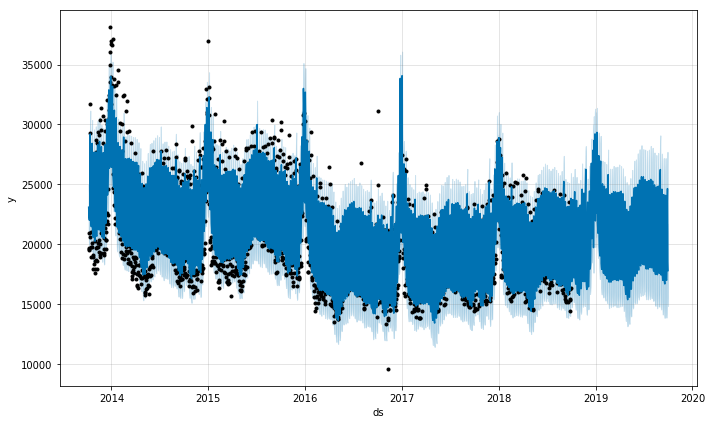

In [31]:
fig_h1 = m_holidays.plot(forecast_h)

The forcast trend looks similar with basic prophet forcast one, there is no big change. 

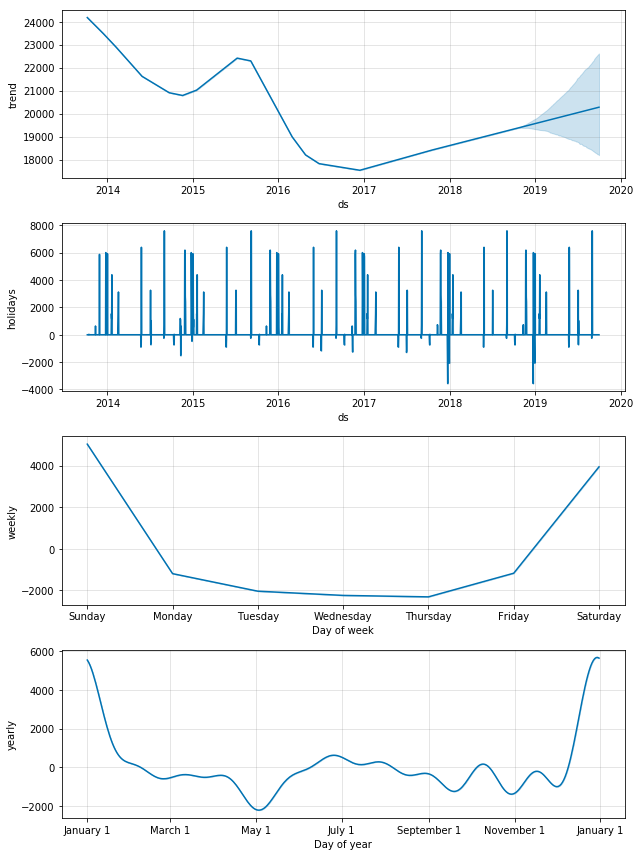

In [32]:
fig_h2 = m_holidays.plot_components(forecast_h)

####  The seasonality with holidays of graphs look like the basic prophet forcast one. 

In [33]:
forecast_h.to_csv('netflix_forecast.csv')

In [34]:
erroranalysis = m_holidays.predict(prophetdataframe)
erroranalysis['value'] = prophetdataframe['y']
erroranalysis['residuals'] = erroranalysis['value']-erroranalysis['yhat']
erroranalysis['absoluteresiduals'] = abs(erroranalysis['residuals'])

In [35]:
totalerror = erroranalysis['absoluteresiduals'].sum()

In [36]:
print(totalerror/len(erroranalysis))

1133.792474889724


#### The accuracy of the model 
The MAE of the model with holidays is 1133.79. Compared to the basic one (MAE = 1297.5), the accuracy is better.  According the forcast plot, the residuals looks consistent across time.

In [37]:
print(erroranalysis.nlargest(10, 'absoluteresiduals'))

             ds         trend    yhat_lower    yhat_upper   trend_lower  \
1090 2016-10-01  17653.081740  19175.826424  23302.817886  17653.081740   
1175 2016-12-25  17563.471988  31863.214329  35791.972254  17563.471988   
1182 2017-01-01  17583.570395  32146.946674  36085.953182  17583.570395   
206  2014-05-01  21937.659623  15505.296332  19344.737352  21937.659623   
81   2013-12-27  23348.017532  25632.827787  29617.388552  23348.017532   
80   2013-12-26  23358.737761  24429.804406  28317.009662  23358.737761   
85   2013-12-31  23305.136617  24786.559157  28887.512454  23305.136617   
87   2014-01-02  23283.696159  24325.344620  28369.656448  23283.696159   
451  2015-01-01  20956.702025  28210.743339  32180.946000  20956.702025   
485  2015-02-04  21167.205475  17187.287768  21060.313284  21167.205475   

       trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
1090  17653.081740       0.000000             0.000000             0.000000   
1175  17563.4719

#### Detecting outlier events
Searching views on the three dates are abnormally high, and should be considered as outliers. There are few news coverages could explain the outliers. 2016-10-01, Netflix down for about 2.5 hours Saturday, that is the reason why searches are so high. 2015-02-04, Netflix’s Marvel Universe Kicks Off would be the potential reason raise the searches. 2014-05-01, Netflix Accidentally Pulls Popular Shows Off The Service could impact some fans of these popular shows. For these outliers, people were searching for Netlix in a negative way. Netflix should think how to use the promotion or advertising to appeal people increasing searches.

Here are news coverages:
2016-10-01 : Netflix down for about 2.5 hours Saturday.
source: https://money.cnn.com/2016/10/01/technology/netflix-outage/index.html
source: https://www.usatoday.com/story/tech/news/2016/10/01/netflix-goes-down-saturday-afternoon/91396200/

2015-02-04: ‘Daredevil’ Trailer: Netflix’s Marvel Universe Kicks Off
source: https://www.slashfilm.com/daredevil-trailer-netflix/

2014-05-01 : Netflix Accidentally Pulls Popular Shows Off The Service   
source: https://techcrunch.com/2014/05/01/netflix-accidentally-pulls-popular-shows-off-the-service/

In [38]:
date = pd.to_datetime("2016-10-01")
theindex = prophetdataframe[prophetdataframe.ds == date].index

In [39]:
print(theindex)

Int64Index([1090], dtype='int64')


In [40]:
prophetdataframe = prophetdataframe.drop(theindex)

## Ad Spend Cleanup

In [41]:
import matplotlib.pyplot as pyplot
from datetime import date

In [42]:
adspend = pd.read_csv('netflix_adspend.csv')
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SYNDICATION DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,"WEEK OF OCT 07, 2013 (B)",Netflix : Online,560.5,222.9,54.6,263.2,19.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"WEEK OF OCT 14, 2013 (B)",Netflix : Online,561.7,117.2,21.3,413.5,9.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"WEEK OF OCT 21, 2013 (B)",Netflix : Online,449.3,145.8,14.1,279.1,10.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"WEEK OF OCT 28, 2013 (B)",Netflix : Online,523.3,44.7,3.7,326.1,21.5,0.0,0.0,0.0,0.0,0.0,0.0,127.2
4,"WEEK OF OCT 28, 2013 (B)",Netflix-Aziz Ansari Buried Alive : Online,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0


In [43]:
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace("WEEK OF","", regex = True)
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace(" \(B\)", "", regex = True)
adspend.columns = adspend.columns.str.replace(" DOLS \(000\)","", regex = True)
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL,NETWORK TV,CABLE TV,SYNDICATION,SPOT TV,MAGAZINES,SUNDAY MAGS,NATL NEWSP,NEWSPAPER,NETWORK RADIO,NAT SPOT RADIO,OUTDOOR
0,"OCT 07, 2013",Netflix : Online,560.5,222.9,54.6,263.2,19.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"OCT 14, 2013",Netflix : Online,561.7,117.2,21.3,413.5,9.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"OCT 21, 2013",Netflix : Online,449.3,145.8,14.1,279.1,10.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"OCT 28, 2013",Netflix : Online,523.3,44.7,3.7,326.1,21.5,0.0,0.0,0.0,0.0,0.0,0.0,127.2
4,"OCT 28, 2013",Netflix-Aziz Ansari Buried Alive : Online,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0


In [44]:
adspend['FIXED TIME'] = pd.to_datetime(adspend['TIME PERIOD'])
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL,NETWORK TV,CABLE TV,SYNDICATION,SPOT TV,MAGAZINES,SUNDAY MAGS,NATL NEWSP,NEWSPAPER,NETWORK RADIO,NAT SPOT RADIO,OUTDOOR,FIXED TIME
0,"OCT 07, 2013",Netflix : Online,560.5,222.9,54.6,263.2,19.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-10-07
1,"OCT 14, 2013",Netflix : Online,561.7,117.2,21.3,413.5,9.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-10-14
2,"OCT 21, 2013",Netflix : Online,449.3,145.8,14.1,279.1,10.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-10-21
3,"OCT 28, 2013",Netflix : Online,523.3,44.7,3.7,326.1,21.5,0.0,0.0,0.0,0.0,0.0,0.0,127.2,2013-10-28
4,"OCT 28, 2013",Netflix-Aziz Ansari Buried Alive : Online,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,2013-10-28


In [45]:
adspendnoproducts = adspend.pivot_table(index = 'FIXED TIME', aggfunc= np.sum)
adspendnoproducts.head()

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL
FIXED TIME,,,,,,,,,,,,
2013-10-07,54.6,0.0,0.0,0.0,0.0,222.9,0.0,0.0,19.8,0.0,263.2,560.5
2013-10-14,21.3,0.0,0.0,0.0,0.0,117.2,0.0,0.0,9.7,0.0,413.5,561.7
2013-10-21,14.1,0.0,0.0,0.0,0.0,145.8,0.0,0.0,10.3,0.0,279.1,449.3
2013-10-28,3.7,0.0,0.0,0.0,0.0,44.7,0.0,233.0,21.5,0.0,326.1,629.1
2013-11-04,13.0,0.0,0.0,0.0,0.0,175.9,0.0,0.0,15.1,0.0,215.3,419.3


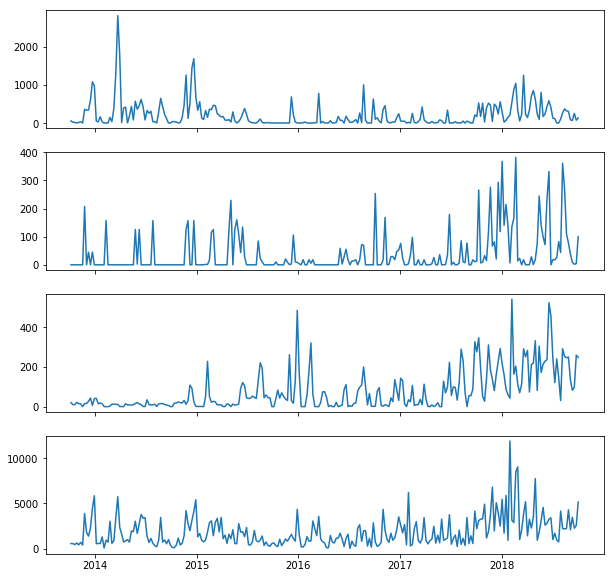

In [46]:
dimentions = (10,10)
fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(4, figsize = dimentions, sharex= 'all')

ax1.plot(adspendnoproducts.index, adspendnoproducts['CABLE TV'])
ax2.plot(adspendnoproducts.index, adspendnoproducts['NEWSPAPER'])
ax3.plot(adspendnoproducts.index, adspendnoproducts['SPOT TV'])
ax4.plot(adspendnoproducts.index, adspendnoproducts['TOTAL'])


The total ad spend(the fourth graph) shows that Netflix spent more on advertising between 2017 to 2018. We know that Netflix spent more on cable TV and some on newspapers between 2014 to 2015. After 2016, Netflix focus the strategies of advertising on newspaper and spot TV. Note that Neflix purchases more advertising both in newspaper and spot TV in 2018. 

In [47]:
netflix = pd.read_csv('netflix.googletrends.csv', parse_dates = ['period'])
netflix.set_index('period', inplace= True)
netflix.head()

,Unnamed: 0,date,value,onediffvalue
period,,,,
2013-10-07,0,Oct 07 2013,20942.326772,NaN
2013-10-08,1,Oct 08 2013,19561.720016,-1380.606756
2013-10-09,2,Oct 09 2013,19687.062718,125.342702
2013-10-10,3,Oct 10 2013,19506.168851,-180.893867
2013-10-11,4,Oct 11 2013,20603.586578,1097.417727


In [48]:
netflixweekly = netflix.resample('W-MON', closed = 'left', label = 'left').mean()
netflixweekly.head()

,Unnamed: 0,value,onediffvalue
period,,,
2013-10-07,3,23036.869497,1388.118410
2013-10-14,10,22465.428787,-266.111253
2013-10-21,17,22193.359108,-89.733567
2013-10-28,24,21304.295078,270.084702
2013-11-04,31,21776.840104,94.596812


In [49]:
mergedweeklydata = adspendnoproducts.join(netflixweekly)
mergedweeklydata.head()

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL,Unnamed: 0,value,onediffvalue
FIXED TIME,,,,,,,,,,,,,,,
2013-10-07,54.6,0.0,0.0,0.0,0.0,222.9,0.0,0.0,19.8,0.0,263.2,560.5,3,23036.869497,1388.118410
2013-10-14,21.3,0.0,0.0,0.0,0.0,117.2,0.0,0.0,9.7,0.0,413.5,561.7,10,22465.428787,-266.111253
2013-10-21,14.1,0.0,0.0,0.0,0.0,145.8,0.0,0.0,10.3,0.0,279.1,449.3,17,22193.359108,-89.733567
2013-10-28,3.7,0.0,0.0,0.0,0.0,44.7,0.0,233.0,21.5,0.0,326.1,629.1,24,21304.295078,270.084702
2013-11-04,13.0,0.0,0.0,0.0,0.0,175.9,0.0,0.0,15.1,0.0,215.3,419.3,31,21776.840104,94.596812


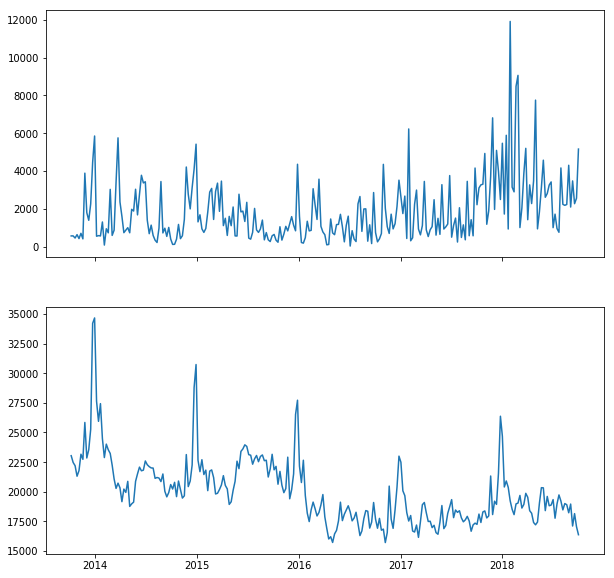

In [50]:
dimentions = (10,10)
fig, (ax1, ax2) = pyplot.subplots(2, figsize = dimentions, sharex= 'all')
     
ax1.plot(mergedweeklydata.index, mergedweeklydata['TOTAL'])
ax2.plot(mergedweeklydata.index, mergedweeklydata['value'])

The first graph is the total spend of advertising, and the second graph is total searches on google. Compare to the two graphs, the trends (slope) are opposite. We infer that Netflix spends more on advertising when total subscribers decrease. Potentially customers have more options for streaming media. Thus, I think Google search interest drive advertising expenditures.

In [51]:
mergedweeklydata['TOTAL'].corr(mergedweeklydata['value'])

0.08120347122905762

In [52]:
mergedweeklydata['TOTALdiff'] = mergedweeklydata['TOTAL'].diff(1)
mergedweeklydata['valuediff'] = mergedweeklydata['value'].diff(1)

In [53]:
mergedweeklydata['TOTALdiff'].corr(mergedweeklydata['valuediff'])

0.1925527367525974

We got the higer correlation(0.19 vs 0.08) with the stationary data. 

In [54]:
mergedweeklydata.head()

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL,Unnamed: 0,value,onediffvalue,TOTALdiff,valuediff
FIXED TIME,,,,,,,,,,,,,,,,,
2013-10-07,54.6,0.0,0.0,0.0,0.0,222.9,0.0,0.0,19.8,0.0,263.2,560.5,3,23036.869497,1388.118410,NaN,NaN
2013-10-14,21.3,0.0,0.0,0.0,0.0,117.2,0.0,0.0,9.7,0.0,413.5,561.7,10,22465.428787,-266.111253,1.2,-571.440710
2013-10-21,14.1,0.0,0.0,0.0,0.0,145.8,0.0,0.0,10.3,0.0,279.1,449.3,17,22193.359108,-89.733567,-112.4,-272.069679
2013-10-28,3.7,0.0,0.0,0.0,0.0,44.7,0.0,233.0,21.5,0.0,326.1,629.1,24,21304.295078,270.084702,179.8,-889.064030
2013-11-04,13.0,0.0,0.0,0.0,0.0,175.9,0.0,0.0,15.1,0.0,215.3,419.3,31,21776.840104,94.596812,-209.8,472.545026


In [55]:
mergedweeklydata.to_csv('Netflix.adspend.googletrends.weekly.csv')

### Correlation and Lags
Convert the data into staionary and calculate the correlation and lags.  

In [56]:
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
import seaborn as sns
import matplotlib.pyplot as pyplot
from statistics import mode

In [57]:
adspend_trends = pd.read_csv('Netflix.adspend.googletrends.weekly.csv', parse_dates = ['FIXED TIME'])
adspend_trends.set_index('FIXED TIME', inplace=True)
adspend_trends = adspend_trends.drop(columns = ['onediffvalue', 'Unnamed: 0', 'TOTALdiff','valuediff'])

In [58]:
for acolumn in list(adspend_trends):
    adf_result = stattools.adfuller(adspend_trends[acolumn])
    print(adf_result[1])

4.944569609526588e-09
0.06237188986361679
0.6888967165130822
0.5507690801310768
0.9967319472189904
5.200387873510148e-06
0.09667874305370416
0.7976617760666814
0.34853519025821755
4.858038849581863e-29
0.2744078405823607
0.24171083022075313
0.05338918570506056


In [59]:
adspend_trends_diff = pd.DataFrame()

In [60]:
for acolumn in list(adspend_trends):
    columnname = "%s_diff" % (acolumn)
    adspend_trends_diff[columnname] = adspend_trends[acolumn].diff(1)    

In [61]:
adspend_trends_diff.head()

,CABLE TV_diff,MAGAZINES_diff,NAT SPOT RADIO_diff,NATL NEWSP_diff,NETWORK RADIO_diff,NETWORK TV_diff,NEWSPAPER_diff,OUTDOOR_diff,SPOT TV_diff,SUNDAY MAGS_diff,SYNDICATION_diff,TOTAL_diff,value_diff
FIXED TIME,,,,,,,,,,,,,
2013-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-14,-33.3,0.0,0.0,0.0,0.0,-105.7,0.0,0.0,-10.1,0.0,150.3,1.2,-571.440710
2013-10-21,-7.2,0.0,0.0,0.0,0.0,28.6,0.0,0.0,0.6,0.0,-134.4,-112.4,-272.069679
2013-10-28,-10.4,0.0,0.0,0.0,0.0,-101.1,0.0,233.0,11.2,0.0,47.0,179.8,-889.064030
2013-11-04,9.3,0.0,0.0,0.0,0.0,131.2,0.0,-233.0,-6.4,0.0,-110.8,-209.8,472.545026


In [62]:
for acolumn in list(adspend_trends_diff):
    adf_result = stattools.adfuller(adspend_trends_diff[acolumn].iloc[1:])
    print(adf_result[1])

2.737565394693417e-16
2.834615515519561e-14
8.44449296505387e-15
5.2624941219073705e-12
6.799586104486564e-06
4.097629531847151e-13
2.9107116033648535e-12
1.3630246836291944e-15
3.5528864600703405e-20
1.507821040229618e-13
1.8385816673648825e-17
7.158438380058312e-05
1.1392271366515547e-13


In [63]:
correlationlist = []
for acolumn in list(adspend_trends_diff):
    if "value" not in acolumn:
        corr = adspend_trends_diff[acolumn].corr(adspend_trends_diff['value_diff'])
        print(acolumn, corr)
        correlationlist.append(corr)

CABLE TV_diff 0.22583762289494447
MAGAZINES_diff 0.06325109793242785
NAT SPOT RADIO_diff 0.015830613599825728
NATL NEWSP_diff 0.006884902386043918
NETWORK RADIO_diff -0.011859687368350287
NETWORK TV_diff 0.10135549291667001
NEWSPAPER_diff 0.1467699810907667
OUTDOOR_diff 0.1014809905663858
SPOT TV_diff 0.0032609979080654387
SUNDAY MAGS_diff 0.03815277774950763
SYNDICATION_diff 0.13103348173513618
TOTAL_diff 0.19255273675259738


We got the some high correlations such as the cable TV(0.22) newspaper(0.14), syndication(0.13)and the total diff(0.19).

In [64]:
np.mean(correlationlist)

0.08454591734700173

In [65]:
correlationlist = []
for acolumn in list(adspend_trends):
    if "value" not in acolumn:
        corr = adspend_trends[acolumn].corr(adspend_trends['value'])
        print(acolumn, corr)
        correlationlist.append(corr)

CABLE TV 0.21892263376835824
MAGAZINES 0.046300073814688536
NAT SPOT RADIO 0.002552340950664359
NATL NEWSP -0.07646465012745696
NETWORK RADIO -0.03434896726987086
NETWORK TV 0.03963532333592225
NEWSPAPER 0.036582132171424885
OUTDOOR -0.08538097423863099
SPOT TV -0.12335650065608936
SUNDAY MAGS -0.01927277851110319
SYNDICATION 0.4957915836255963
TOTAL 0.08120347122905759


In [66]:
np.mean(correlationlist)

0.04851364067438007

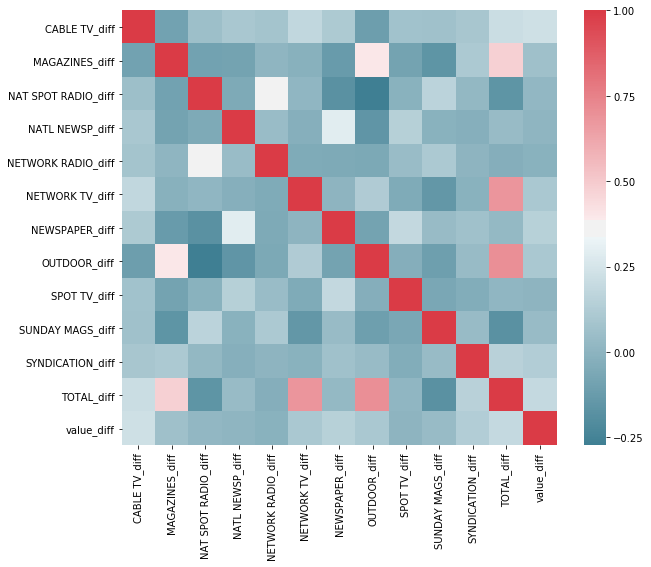

In [67]:
f, ax = pyplot.subplots(figsize=(10,8))
corr = adspend_trends_diff.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [68]:
numofweeks = 8
significantlags = []
for acolumn in list(adspend_trends_diff):
    if 'value' not in acolumn:
        testframe = adspend_trends_diff[['value_diff', acolumn]]
        testframe = testframe.iloc[1:]
        results = stattools.grangercausalitytests(testframe, numofweeks, verbose = False)
        for week in range(1, numofweeks+1):
            if results[week][0]['params_ftest'][1] < .05:
                print('%s is significant at %s weeks' % (acolumn, week))
                significantlags.append(week)

CABLE TV_diff is significant at 1 weeks
NAT SPOT RADIO_diff is significant at 1 weeks
NAT SPOT RADIO_diff is significant at 3 weeks
NAT SPOT RADIO_diff is significant at 4 weeks
NAT SPOT RADIO_diff is significant at 5 weeks
NAT SPOT RADIO_diff is significant at 6 weeks
NAT SPOT RADIO_diff is significant at 7 weeks
NAT SPOT RADIO_diff is significant at 8 weeks
NETWORK RADIO_diff is significant at 3 weeks
NETWORK RADIO_diff is significant at 4 weeks
NETWORK RADIO_diff is significant at 5 weeks
NETWORK RADIO_diff is significant at 6 weeks
NETWORK RADIO_diff is significant at 7 weeks
NETWORK RADIO_diff is significant at 8 weeks
OUTDOOR_diff is significant at 2 weeks
OUTDOOR_diff is significant at 3 weeks
OUTDOOR_diff is significant at 5 weeks
SUNDAY MAGS_diff is significant at 2 weeks
SUNDAY MAGS_diff is significant at 3 weeks
SUNDAY MAGS_diff is significant at 4 weeks
SUNDAY MAGS_diff is significant at 5 weeks
SUNDAY MAGS_diff is significant at 6 weeks
SUNDAY MAGS_diff is significant at 7

We could conclude as following: 
1. CABLE TV_diff has one week lags.  
2. NAT SPOT RADIO_diff has 1 to 8 weeks lags.
3. NETWORK RADIO_diff has 3 to 8 weeks lags.
4. OUTDOOR_diff has 2 to 5 weeks lags.
5. SUNDAY MAGS_diff has 2 to 8 weeks lags.
6. SYNDICATION_diff has 4 to 5 weeks lags.
7. TOTAL_diff has 5 to 6 weeks lags.

In [69]:
mode(significantlags)  

5

In [70]:
modelingdataset = adspend_trends_diff

In [71]:
modelingdataset.tail()

,CABLE TV_diff,MAGAZINES_diff,NAT SPOT RADIO_diff,NATL NEWSP_diff,NETWORK RADIO_diff,NETWORK TV_diff,NEWSPAPER_diff,OUTDOOR_diff,SPOT TV_diff,SUNDAY MAGS_diff,SYNDICATION_diff,TOTAL_diff,value_diff
FIXED TIME,,,,,,,,,,,,,
2018-09-03,-220.6,-645.5,49.3,0.0,-71.7,1342.4,-39.3,-2511.7,-114.9,0.0,0.0,-2212.0,733.926281
2018-09-10,-18.3,782.7,0.0,727.9,0.0,-28.2,-28.5,0.0,-51.9,0.0,0.0,1383.7,-1852.512731
2018-09-17,187.1,-259.4,0.0,-94.7,0.0,-1051.6,-7.8,0.0,14.0,0.0,7.3,-1205.2,1045.970161
2018-09-24,-180.5,-98.6,0.0,-595.5,0.0,943.4,2.7,0.0,162.2,0.0,56.7,290.4,-1106.423830
2018-10-01,59.1,470.5,-50.7,416.2,0.0,-1078.4,95.6,2763.9,-11.3,0.0,-64.0,2600.7,-674.268530


In [72]:
date = pd.to_datetime('2018-10-08')
modelingdataset.loc[date] = np.nan

In [73]:
date = pd.to_datetime('2018-10-15')
modelingdataset.loc[date] = np.nan

In [74]:
date = pd.to_datetime('2018-10-22')
modelingdataset.loc[date] = np.nan

In [75]:
date = pd.to_datetime('2018-10-29')
modelingdataset.loc[date] = np.nan

In [76]:
date = pd.to_datetime('2018-11-05')
modelingdataset.loc[date] = np.nan

In [77]:
modelingdataset.tail()

,CABLE TV_diff,MAGAZINES_diff,NAT SPOT RADIO_diff,NATL NEWSP_diff,NETWORK RADIO_diff,NETWORK TV_diff,NEWSPAPER_diff,OUTDOOR_diff,SPOT TV_diff,SUNDAY MAGS_diff,SYNDICATION_diff,TOTAL_diff,value_diff
FIXED TIME,,,,,,,,,,,,,
2018-10-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
for acolumn in list(modelingdataset):
    if 'value' not in acolumn:
        for alag in range(1,6):
            columnname = '%s_lag%s' % (acolumn, alag)
            modelingdataset[columnname] = modelingdataset[acolumn].shift(alag)

In [79]:
modelingdataset.sort_index(axis = 1, inplace=True)
modelingdataset.head()

,CABLE TV_diff,CABLE TV_diff_lag1,CABLE TV_diff_lag2,CABLE TV_diff_lag3,CABLE TV_diff_lag4,CABLE TV_diff_lag5,MAGAZINES_diff,MAGAZINES_diff_lag1,MAGAZINES_diff_lag2,MAGAZINES_diff_lag3,...,SYNDICATION_diff_lag3,SYNDICATION_diff_lag4,SYNDICATION_diff_lag5,TOTAL_diff,TOTAL_diff_lag1,TOTAL_diff_lag2,TOTAL_diff_lag3,TOTAL_diff_lag4,TOTAL_diff_lag5,value_diff
FIXED TIME,,,,,,,,,,,,,,,,,,,,,
2013-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-14,-33.3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,-571.440710
2013-10-21,-7.2,-33.3,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,-112.4,1.2,NaN,NaN,NaN,NaN,-272.069679
2013-10-28,-10.4,-7.2,-33.3,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,179.8,-112.4,1.2,NaN,NaN,NaN,-889.064030
2013-11-04,9.3,-10.4,-7.2,-33.3,NaN,NaN,0.0,0.0,0.0,0.0,...,150.3,NaN,NaN,-209.8,179.8,-112.4,1.2,NaN,NaN,472.545026


In [80]:
modelingdataset.to_csv('Netflix_google_adspend_differenced_lagged_fordatarobot.csv')

### LASSO Regression

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

In [82]:
alldata = pd.read_csv('Netflix_google_adspend_differenced_lagged_fordatarobot.csv')

In [83]:
alldata.set_index(alldata['FIXED TIME'],inplace= True)

In [84]:
alldata = alldata.drop(columns=['FIXED TIME'])

In [85]:
alldata.tail()

,CABLE TV_diff,CABLE TV_diff_lag1,CABLE TV_diff_lag2,CABLE TV_diff_lag3,CABLE TV_diff_lag4,CABLE TV_diff_lag5,MAGAZINES_diff,MAGAZINES_diff_lag1,MAGAZINES_diff_lag2,MAGAZINES_diff_lag3,...,SYNDICATION_diff_lag3,SYNDICATION_diff_lag4,SYNDICATION_diff_lag5,TOTAL_diff,TOTAL_diff_lag1,TOTAL_diff_lag2,TOTAL_diff_lag3,TOTAL_diff_lag4,TOTAL_diff_lag5,value_diff
FIXED TIME,,,,,,,,,,,,,,,,,,,,,
2018-10-08,NaN,59.1,-180.5,187.1,-18.3,-220.6,NaN,470.5,-98.6,-259.4,...,7.3,0.0,0.0,NaN,2600.7,290.4,-1205.2,1383.7,-2212.0,NaN
2018-10-15,NaN,NaN,59.1,-180.5,187.1,-18.3,NaN,NaN,470.5,-98.6,...,56.7,7.3,0.0,NaN,NaN,2600.7,290.4,-1205.2,1383.7,NaN
2018-10-22,NaN,NaN,NaN,59.1,-180.5,187.1,NaN,NaN,NaN,470.5,...,-64.0,56.7,7.3,NaN,NaN,NaN,2600.7,290.4,-1205.2,NaN
2018-10-29,NaN,NaN,NaN,NaN,59.1,-180.5,NaN,NaN,NaN,NaN,...,NaN,-64.0,56.7,NaN,NaN,NaN,NaN,2600.7,290.4,NaN
2018-11-05,NaN,NaN,NaN,NaN,NaN,59.1,NaN,NaN,NaN,NaN,...,NaN,NaN,-64.0,NaN,NaN,NaN,NaN,NaN,2600.7,NaN


In [86]:
alldata = alldata.iloc[6:]

In [87]:
alldata = alldata.iloc[:-6]

In [88]:
alldata.tail()

,CABLE TV_diff,CABLE TV_diff_lag1,CABLE TV_diff_lag2,CABLE TV_diff_lag3,CABLE TV_diff_lag4,CABLE TV_diff_lag5,MAGAZINES_diff,MAGAZINES_diff_lag1,MAGAZINES_diff_lag2,MAGAZINES_diff_lag3,...,SYNDICATION_diff_lag3,SYNDICATION_diff_lag4,SYNDICATION_diff_lag5,TOTAL_diff,TOTAL_diff_lag1,TOTAL_diff_lag2,TOTAL_diff_lag3,TOTAL_diff_lag4,TOTAL_diff_lag5,value_diff
FIXED TIME,,,,,,,,,,,,,,,,,,,,,
2018-08-27,-15.8,-49.2,101.4,166.2,102.1,0.0,123.8,260.7,261.0,-839.5,...,0.0,0.0,0.0,2076.1,44.5,-52.6,-1926.4,3405.8,-197.1,-679.297658
2018-09-03,-220.6,-15.8,-49.2,101.4,166.2,102.1,-645.5,123.8,260.7,261.0,...,0.0,0.0,0.0,-2212.0,2076.1,44.5,-52.6,-1926.4,3405.8,733.926281
2018-09-10,-18.3,-220.6,-15.8,-49.2,101.4,166.2,782.7,-645.5,123.8,260.7,...,0.0,0.0,0.0,1383.7,-2212.0,2076.1,44.5,-52.6,-1926.4,-1852.512731
2018-09-17,187.1,-18.3,-220.6,-15.8,-49.2,101.4,-259.4,782.7,-645.5,123.8,...,0.0,0.0,0.0,-1205.2,1383.7,-2212.0,2076.1,44.5,-52.6,1045.970161
2018-09-24,-180.5,187.1,-18.3,-220.6,-15.8,-49.2,-98.6,-259.4,782.7,-645.5,...,0.0,0.0,0.0,290.4,-1205.2,1383.7,-2212.0,2076.1,44.5,-1106.423830


In [89]:
listofallpredictors = []
for avar in list(alldata):
    if "value" not in avar:
        listofallpredictors.append(avar)

In [90]:
print(listofallpredictors)

['CABLE TV_diff', 'CABLE TV_diff_lag1', 'CABLE TV_diff_lag2', 'CABLE TV_diff_lag3', 'CABLE TV_diff_lag4', 'CABLE TV_diff_lag5', 'MAGAZINES_diff', 'MAGAZINES_diff_lag1', 'MAGAZINES_diff_lag2', 'MAGAZINES_diff_lag3', 'MAGAZINES_diff_lag4', 'MAGAZINES_diff_lag5', 'NAT SPOT RADIO_diff', 'NAT SPOT RADIO_diff_lag1', 'NAT SPOT RADIO_diff_lag2', 'NAT SPOT RADIO_diff_lag3', 'NAT SPOT RADIO_diff_lag4', 'NAT SPOT RADIO_diff_lag5', 'NATL NEWSP_diff', 'NATL NEWSP_diff_lag1', 'NATL NEWSP_diff_lag2', 'NATL NEWSP_diff_lag3', 'NATL NEWSP_diff_lag4', 'NATL NEWSP_diff_lag5', 'NETWORK RADIO_diff', 'NETWORK RADIO_diff_lag1', 'NETWORK RADIO_diff_lag2', 'NETWORK RADIO_diff_lag3', 'NETWORK RADIO_diff_lag4', 'NETWORK RADIO_diff_lag5', 'NETWORK TV_diff', 'NETWORK TV_diff_lag1', 'NETWORK TV_diff_lag2', 'NETWORK TV_diff_lag3', 'NETWORK TV_diff_lag4', 'NETWORK TV_diff_lag5', 'NEWSPAPER_diff', 'NEWSPAPER_diff_lag1', 'NEWSPAPER_diff_lag2', 'NEWSPAPER_diff_lag3', 'NEWSPAPER_diff_lag4', 'NEWSPAPER_diff_lag5', 'OUTDOOR

In [91]:
predictors = alldata[listofallpredictors]

In [92]:
target = alldata['value_diff']

In [93]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size =.3, random_state = 123)

In [94]:
model = LassoLarsCV(cv = 10, precompute=False)

In [95]:
model = model.fit(pred_train.values, tar_train.values)

In [96]:
predictors_model = pd.DataFrame(listofallpredictors)
predictors_model.columns = ['label']
predictors_model['coeff'] = model.coef_

In [97]:
for index, row in predictors_model.iterrows():
    if row['coeff']>0:
        print(row.values)

['CABLE TV_diff' 0.07188921364961877]
['CABLE TV_diff_lag1' 0.12704813885202196]
['NAT SPOT RADIO_diff_lag1' 1.0003929276120975]
['NETWORK TV_diff_lag5' 0.09764161548565292]
['NEWSPAPER_diff' 0.18179302285618254]
['SUNDAY MAGS_diff_lag3' 4.203704769292124]
['SYNDICATION_diff' 0.20838017841523135]
['TOTAL_diff' 0.07258828799477712]


We got some significant variables from LASSO model, the SUNDAY MAGS_lag3 has the highest coefficient (4.20), the second is NAT SPOT RADIO_diff_lag1(1.00). The following order is CABLE TV_diff_lag1(0.127), SYNDICATION_diff(0.20), NEWSPAPER_diff(0.18), NETWORK TV_diff_lag5(0.09)and etc. 

In order to achieve successful campaign managers should maximize impact factors as mentioned above. Examples placing the advertising on SUNDAY MAGS, SPOT RADIO, CABLE TV, SYNDICATION and NEWSPAPER are the best way to target audience.

However, the datarobot has a different result. The best model is 'Light Gradient Boosted Trees Regressor'. The order of good predictors is OUTDOOR, SUNDAY MAGS , NEWSPAPER and NAT SPOT RADIO which means Netflix should invest money on these channels to reach out the potential consumers.

In [98]:
train_error = mean_squared_error(tar_train, model.predict(pred_train))
print('training data MSE')
print(train_error)

training data MSE
2356505.91748121


In [99]:
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print('test data MSE')
print(test_error)

test data MSE
2626561.2581724175


In [100]:
rsquared_train = model.score(pred_train, tar_train)
print('training data r-square')
print(rsquared_train)

training data r-square
0.12249444879922544


In [101]:
rsquared_test = model.score(pred_test, tar_test)
print('test data r-square')
print(rsquared_test)

test data r-square
-0.06463670106192043
